In [14]:
import regionmask
import numpy as np
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Read files

In [2]:
box=xr.open_dataset("polygon_box.nc")
triangle=xr.open_dataset("polygon_triangle.nc")
multipolys=xr.open_dataset("polygon_multipolys.nc")

shp_box=gpd.read_file('polygon_box.geojson')
shp_triangle=gpd.read_file('polygon_triangle.geojson')
shp_multipolys=gpd.read_file('polygon_multipolys.geojson')

<AxesSubplot:xlabel='lon', ylabel='lat'>

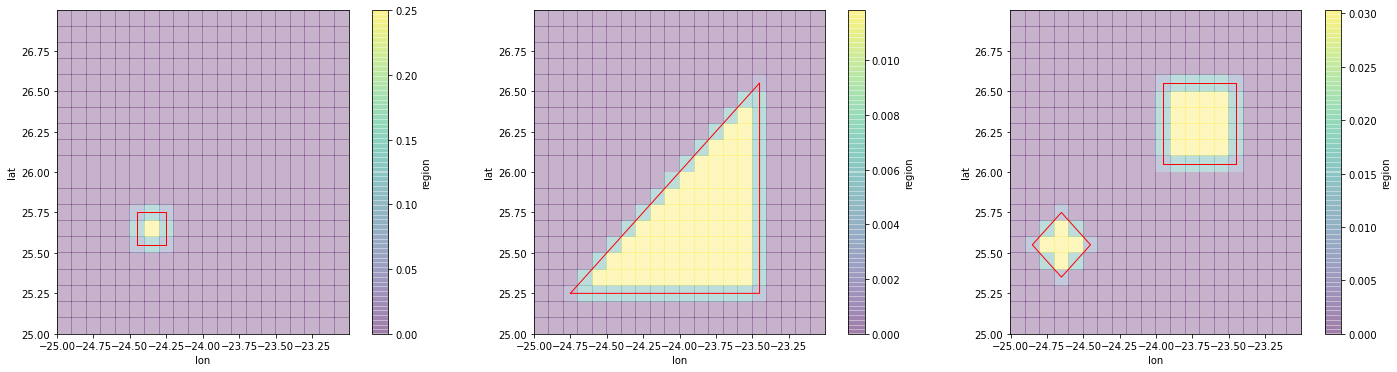

In [3]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
box.region.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
triangle.region.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
multipolys.region.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 

# Mask Shapes with Regionmask

In [4]:
my_box=regionmask.mask_geopandas(shp_box, box.lon, box.lat, method="weights_default")
my_triangle=regionmask.mask_geopandas(shp_triangle, triangle.lon, triangle.lat, method="weights_default")

polygon=[shp_multipolys[shp_multipolys["Name"]=="poly1"],shp_multipolys[shp_multipolys["Name"]=="poly2"]]
my_multipolys=regionmask.mask_geopandas(polygon, multipolys.lon, multipolys.lat, method="weights_default")

<AxesSubplot:xlabel='lon', ylabel='lat'>

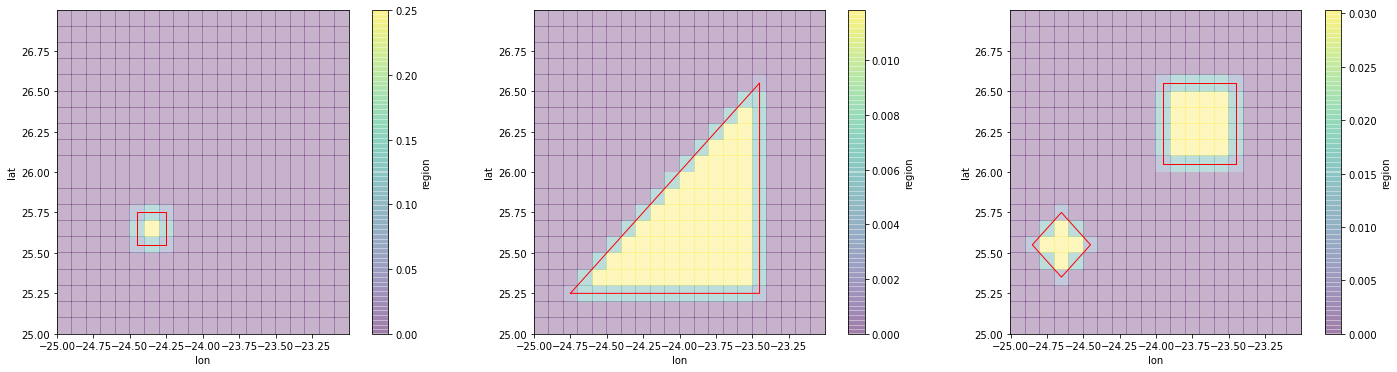

In [5]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
my_box.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
my_triangle.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
my_multipolys.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 

# Mask Rot. Pole Grids

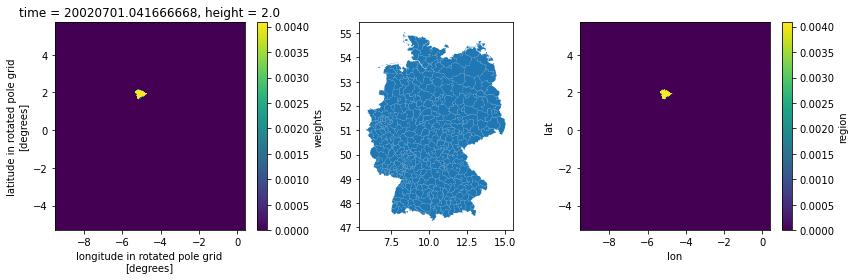

In [12]:
infile='../../examples/Region_Hannover_SBK_weights_REMO_NH.nc'
ds1 = xr.open_dataset(infile)

shapefile_tot = '../../examples/DEU_adm2.shp'
poly = gpd.read_file(shapefile_tot)


fig, axs = plt.subplots(1,3,figsize=(12,4),tight_layout=True)

ds1['weights'].plot(ax=axs[0])
poly.plot(ax=axs[1])

rot_mask=regionmask.mask_geopandas(poly[poly['NAME_2']=='Region Hannover'], ds1.rlon, ds1.rlat, method="weights_rot_pole",pole_longitude=-162,pole_latitude=39.25,central_rotated_longitude=0, globe='WGS84')
rot_mask.plot(ax=axs[2])

# Mask SREX Region with 2ºx2º Grid

In [114]:
# Grid
lon1=np.arange(0,360,2)
#lon1=np.arange(-180,180,0.5)
lat1=np.arange(-90,92,0.5)
weights=np.zeros((len(lat1),len(lon1)))
ds=xr.DataArray(weights, [('lat', lat1),('lon',lon1)], name='weights')

# SREX polygon
crs="EPSG:4326"
#Coast South america
boundary4 = gpd.GeoSeries(regionmask.defined_regions.srex[14].polygon,crs=crs)

In [53]:
end_t=np.zeros(100)
for i in range(100):
    start = time.time()
    my_srex=regionmask.mask_geopandas(boundary4, ds.lon,ds.lat, method="weights_default")
    end = time.time()
    end_t[i]=end - start
print(f"Runtime of the program is {np.mean(end_t)} sec")

Runtime of the program is 0.3399584650993347


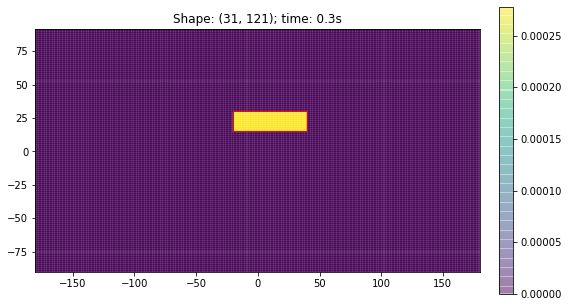

In [113]:
plt.figure(figsize=(8,10),tight_layout=True)

ax = plt.subplot()
cax=plt.pcolormesh(my_srex.lon,my_srex.lat,my_srex[:,:],alpha=0.3,shading="auto")
plt.colorbar(cax,fraction=0.03, pad=0.04)
boundary4.plot(ax=ax,edgecolor="r",facecolor="none") 
plt.title("Shape: "+ str(np.shape(my_srex[52*4+2:62*4-7,79*4+4:112*4-7]))+"; time: "+str(np.mean(end_t))[:5]+"s")
plt.show()

# Crossing boundaries

In [118]:
# Grid
lon1=np.arange(0,360,2)
lat1=np.arange(-90,92,2)
weights=np.zeros((len(lat1),len(lon1)))
ds=xr.DataArray(weights, [('lat', lat1),('lon',lon1)], name='weights')

# SREX polygon
crs="EPSG:4326"
#Coast South america
boundary4 = gpd.GeoSeries(regionmask.defined_regions.srex[14].polygon,crs=crs)

In [119]:
end_t=np.zeros(100)
for i in range(100):
    start = time.time()
    my_srex=regionmask.mask_geopandas(boundary4, ds.lon,ds.lat, method="weights_default")
    end = time.time()
    end_t[i]=end - start
print(f"Runtime of the program is {np.mean(end_t)} sec")

Runtime of the program is 0.03050715208053589 sec


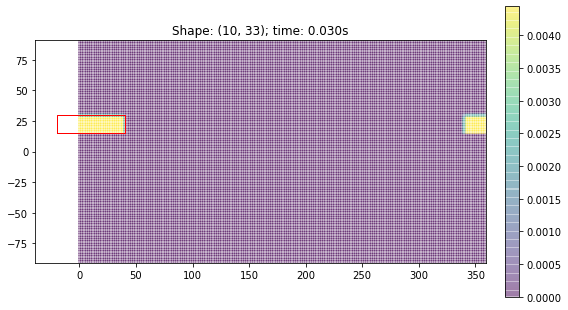

In [120]:
plt.figure(figsize=(8,10),tight_layout=True)

ax = plt.subplot()
cax=plt.pcolormesh(my_srex.lon,my_srex.lat,my_srex[:,:],alpha=0.3,shading="auto")
plt.colorbar(cax,fraction=0.03, pad=0.04)
boundary4.plot(ax=ax,edgecolor="r",facecolor="none") 
plt.title("Shape: "+ str(np.shape(my_srex[52:62,79:112]))+"; time: "+str(np.mean(end_t))[:5]+"s")
plt.show()